## House Price Predictor


In [51]:
import pandas as pd
import numpy as np
housing=pd.read_csv("Train.csv")

In [52]:
housing.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29460 entries, 0 to 29459
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29460 non-null  object 
 1   UNDER_CONSTRUCTION     29460 non-null  int64  
 2   RERA                   29460 non-null  int64  
 3   BHK_NO.                29460 non-null  int64  
 4   BHK_OR_RK              29460 non-null  object 
 5   SQUARE_FT              29460 non-null  float64
 6   READY_TO_MOVE          29460 non-null  int64  
 7   RESALE                 29460 non-null  int64  
 8   ADDRESS                29460 non-null  object 
 9   LONGITUDE              29460 non-null  float64
 10  LATITUDE               29460 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29460 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [54]:
print(housing.isnull().sum())

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64


In [55]:
housing['RERA'].value_counts()

RERA
0    20097
1     9363
Name: count, dtype: int64

In [56]:
housing['READY_TO_MOVE'].value_counts()   

READY_TO_MOVE
1    24166
0     5294
Name: count, dtype: int64

In [57]:
housing['RESALE'].value_counts()

RESALE
1    27386
0     2074
Name: count, dtype: int64

In [58]:
housing['UNDER_CONSTRUCTION'].value_counts()

UNDER_CONSTRUCTION
0    24166
1     5294
Name: count, dtype: int64

In [59]:
housing['POSTED_BY'].value_counts() 

POSTED_BY
Dealer     18300
Owner      10538
Builder      622
Name: count, dtype: int64

In [60]:
housing['BHK_NO.'].value_counts()

BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
13       10
20        4
10        4
15        4
12        3
9         3
17        1
11        1
Name: count, dtype: int64

In [61]:
housing['ADDRESS'].value_counts()

ADDRESS
Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad         215
Sector-137 Noida,Noida                139
New Town,Kolkata                      131
                                     ... 
Ambika Township,Jivarajpark,Rajkot      1
Cheranalloor,Kochi                      1
Baba Nagar,Bangalore                    1
Barra Devi Naubasta road,Kanpur         1
E3-108, Lake View Recidency,,Vapi       1
Name: count, Length: 6899, dtype: int64

In [62]:
housing['TARGET(PRICE_IN_LACS)'].value_counts()

TARGET(PRICE_IN_LACS)
110.0      795
100.0      770
120.0      652
130.0      598
45.0       583
          ... 
86.1         1
1550.0       1
28000.0      1
9910.0       1
18.3         1
Name: count, Length: 1172, dtype: int64

In [63]:
housing.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29460.000000,29460.000000,29460.000000,2.946000e+04,29460.000000,29460.000000,29460.000000,29460.000000,29460.000000
mean,0.179701,0.317821,2.395519,1.979932e+04,0.820299,0.929599,21.297763,76.837949,143.007840
std,0.383945,0.465637,0.898294,1.901044e+06,0.383945,0.255825,6.205996,10.556144,656.810013
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000225e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175088e+03,1.000000,1.000000,20.750000,77.324966,62.000000
75%,0.000000,1.000000,3.000000,1.552067e+03,1.000000,1.000000,26.900926,77.820000,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [64]:
housing['ADDRESS'] = housing['ADDRESS'].str.split(',').apply(lambda x: x[-1])
housing

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29455,Dealer,0,0,13,BHK,10460.251050,1,1,Bangalore,13.143933,77.667304,500.0
29456,Dealer,0,0,13,BHK,10460.251050,1,1,Bangalore,13.143933,77.667304,500.0
29457,Dealer,0,0,13,BHK,10460.251050,1,1,Bangalore,13.143933,77.667304,500.0
29458,Dealer,0,0,13,BHK,10460.251050,1,1,Bangalore,13.143933,77.667304,500.0


In [65]:
housing['ADDRESS'].unique()

array(['Bangalore', 'Mysore', 'Ghaziabad', 'Kolkata', 'Kochi', 'Jaipur',
       'Mohali', 'Chennai', 'Siliguri', 'Noida', 'Raigad', 'Bhubaneswar',
       'Wardha', 'Pune', 'Mumbai', 'Nagpur', 'Deoghar', 'Bhiwadi',
       'Faridabad', 'Lalitpur', 'Maharashtra', 'Vadodara',
       'Visakhapatnam', 'Vapi', 'Mangalore', 'Aurangabad', 'Ottapalam',
       'Vijayawada', 'Belgaum', 'Bhopal', 'Lucknow', 'Kanpur',
       'Gandhinagar', 'Pondicherry', 'Agra', 'Ranchi', 'Gurgaon', 'Udupi',
       'Indore', 'Jodhpur', 'Coimbatore', 'Valsad', 'Palghar', 'Surat',
       'Varanasi', 'Guwahati', 'Amravati', 'Anand', 'Tirupati',
       'Secunderabad', 'Raipur', 'Vizianagaram', 'Thrissur', 'Satna',
       'Madurai', 'Chandigarh', 'Shimla', 'Gwalior', 'Rajkot', 'Sonipat',
       'Allahabad', 'Berhampur', 'Roorkee', 'Dharuhera', 'Latur',
       'Durgapur', 'Panchkula', 'Solapur', 'Durg', 'Goa', 'Jamshedpur',
       'Hazaribagh', 'Jabalpur', 'Hosur', 'Morbi', 'Hubli', 'Karnal',
       'Patna', 'Bilaspur', '

In [66]:
housing['ADDRESS'].value_counts()

ADDRESS
Bangalore      4349
Lalitpur       2993
Mumbai         2023
Pune           1991
Noida          1767
               ... 
Bhadrak           1
Kurukshetra       1
Dibrugarh         1
Sagar             1
Washim            1
Name: count, Length: 256, dtype: int64

In [67]:
housing.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29460.000000,29460.000000,29460.000000,2.946000e+04,29460.000000,29460.000000,29460.000000,29460.000000,29460.000000
mean,0.179701,0.317821,2.395519,1.979932e+04,0.820299,0.929599,21.297763,76.837949,143.007840
std,0.383945,0.465637,0.898294,1.901044e+06,0.383945,0.255825,6.205996,10.556144,656.810013
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000225e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175088e+03,1.000000,1.000000,20.750000,77.324966,62.000000
75%,0.000000,1.000000,3.000000,1.552067e+03,1.000000,1.000000,26.900926,77.820000,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


array([[<Axes: title={'center': 'UNDER_CONSTRUCTION'}>,
        <Axes: title={'center': 'RERA'}>,
        <Axes: title={'center': 'BHK_NO.'}>],
       [<Axes: title={'center': 'SQUARE_FT'}>,
        <Axes: title={'center': 'READY_TO_MOVE'}>,
        <Axes: title={'center': 'RESALE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'TARGET(PRICE_IN_LACS)'}>]], dtype=object)

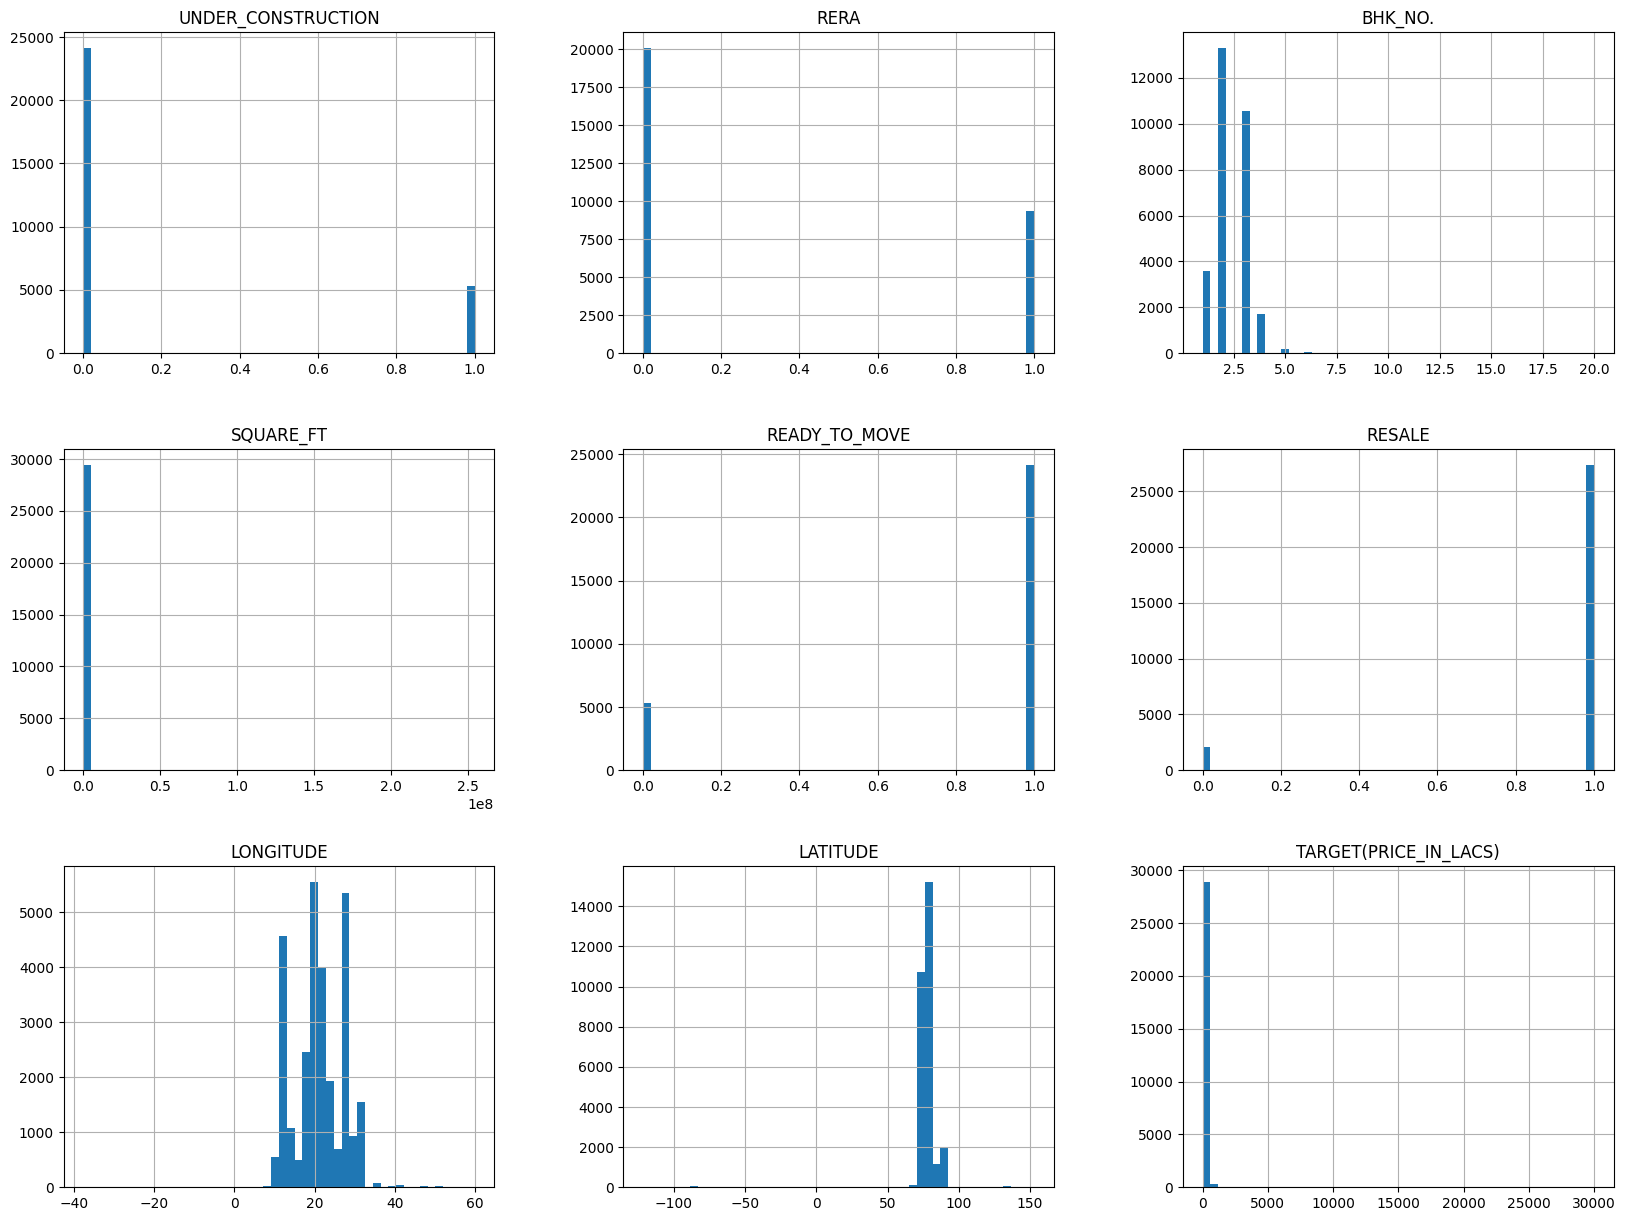

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

<Axes: xlabel='BHK_NO.', ylabel='TARGET(PRICE_IN_LACS)'>

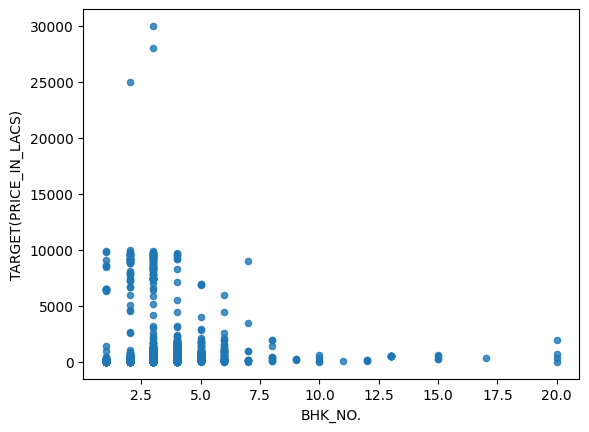

In [69]:
housing.plot(kind="scatter",x='BHK_NO.',y='TARGET(PRICE_IN_LACS)',alpha=0.8)

In [70]:
housing['ADDRESS'].value_counts()

ADDRESS
Bangalore      4349
Lalitpur       2993
Mumbai         2023
Pune           1991
Noida          1767
               ... 
Bhadrak           1
Kurukshetra       1
Dibrugarh         1
Sagar             1
Washim            1
Name: count, Length: 256, dtype: int64

In [71]:
housing.shape

(29460, 12)

In [72]:
housing.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29460.000000,29460.000000,29460.000000,2.946000e+04,29460.000000,29460.000000,29460.000000,29460.000000,29460.000000
mean,0.179701,0.317821,2.395519,1.979932e+04,0.820299,0.929599,21.297763,76.837949,143.007840
std,0.383945,0.465637,0.898294,1.901044e+06,0.383945,0.255825,6.205996,10.556144,656.810013
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000225e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175088e+03,1.000000,1.000000,20.750000,77.324966,62.000000
75%,0.000000,1.000000,3.000000,1.552067e+03,1.000000,1.000000,26.900926,77.820000,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


## Looking For Correlation

In [73]:
g=housing.drop(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'], axis=1)
corr_matriix=g.corr()
corr_matriix['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402666
BHK_NO.                  0.111822
RERA                     0.067515
UNDER_CONSTRUCTION       0.055317
LATITUDE                -0.017240
LONGITUDE               -0.031321
READY_TO_MOVE           -0.055317
RESALE                  -0.207321
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [74]:
g.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363885,-0.041522,-0.004203,-1.000000,-0.347428,0.006626,-0.000392,0.055317
RERA,0.363885,1.000000,0.006878,-0.006228,-0.363885,-0.270386,0.105215,-0.065118,0.067515
BHK_NO.,-0.041522,0.006878,1.000000,0.005171,0.041522,0.015260,0.062493,0.046203,0.111822
SQUARE_FT,-0.004203,-0.006228,0.005171,1.000000,0.004203,0.001731,-0.012586,0.000803,0.402666
READY_TO_MOVE,-1.000000,-0.363885,0.041522,0.004203,1.000000,0.347428,-0.006626,0.000392,-0.055317
RESALE,-0.347428,-0.270386,0.015260,0.001731,0.347428,1.000000,0.023920,0.014850,-0.207321
LONGITUDE,0.006626,0.105215,0.062493,-0.012586,-0.006626,0.023920,1.000000,-0.155052,-0.031321
LATITUDE,-0.000392,-0.065118,0.046203,0.000803,0.000392,0.014850,-0.155052,1.000000,-0.017240
TARGET(PRICE_IN_LACS),0.055317,0.067515,0.111822,0.402666,-0.055317,-0.207321,-0.031321,-0.017240,1.000000


<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

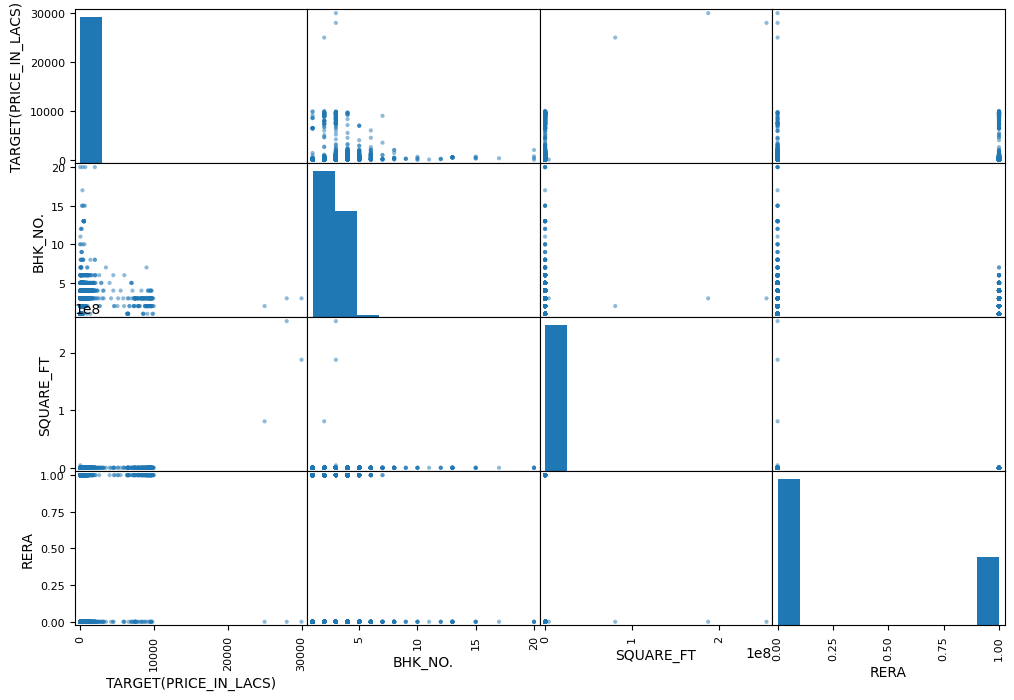

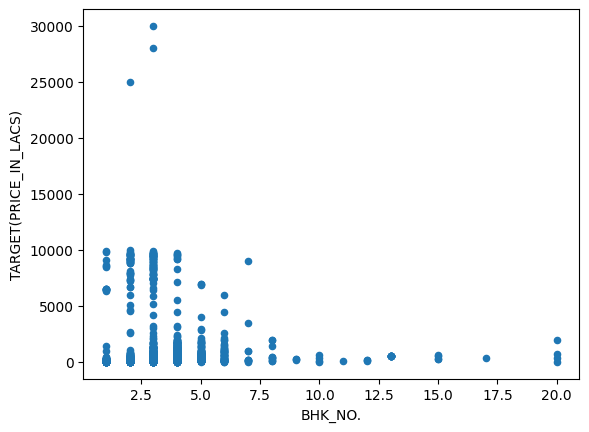

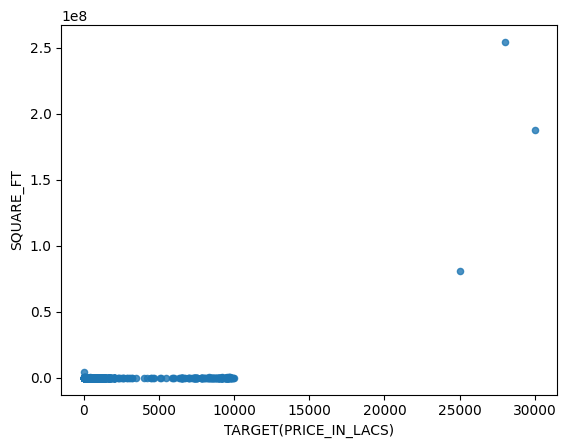

In [75]:
from pandas.plotting import scatter_matrix
attributes=['TARGET(PRICE_IN_LACS)','BHK_NO.','SQUARE_FT','RERA']
scatter_matrix(housing[attributes],figsize=(12,8))
housing.plot(kind="scatter",x='BHK_NO.',y='TARGET(PRICE_IN_LACS)',alpha=1)
housing.plot(kind="scatter",x='TARGET(PRICE_IN_LACS)',y='SQUARE_FT',alpha=0.8)

In [76]:
housing['Price_Per_SQFT']=(housing['TARGET(PRICE_IN_LACS)']*100000)/housing['SQUARE_FT']

In [77]:
(housing['SQUARE_FT']/housing['BHK_NO.']).describe()

count    2.946000e+04
mean     7.202504e+03
std      6.574305e+05
min      1.500000e+00
25%      4.500248e+02
50%      5.316770e+02
75%      6.125828e+02
max      8.484848e+07
dtype: float64

In [78]:
housing['BHK_OR_RK'].value_counts()

BHK_OR_RK
BHK    29436
RK        24
Name: count, dtype: int64

In [79]:
housing=housing.drop(['POSTED_BY','LONGITUDE','LATITUDE'],axis=1)

## Removing price outliers

In [80]:
housing.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),Price_Per_SQFT
count,29460.000000,29460.000000,29460.000000,2.946000e+04,29460.000000,29460.000000,29460.000000,29460.000000
mean,0.179701,0.317821,2.395519,1.979932e+04,0.820299,0.929599,143.007840,7503.106178
std,0.383945,0.465637,0.898294,1.901044e+06,0.383945,0.255825,656.810013,10846.424169
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,0.250000,1.000000
25%,0.000000,0.000000,2.000000,9.000225e+02,1.000000,1.000000,38.000000,3553.000000
50%,0.000000,0.000000,2.000000,1.175088e+03,1.000000,1.000000,62.000000,5093.000000
75%,0.000000,1.000000,3.000000,1.552067e+03,1.000000,1.000000,100.000000,8055.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,30000.000000,900000.000000


C:\Users\gs671\AppData\Local\Temp\ipykernel_8976\3282118947.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['TARGET(PRICE_IN_LACS)'])


<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

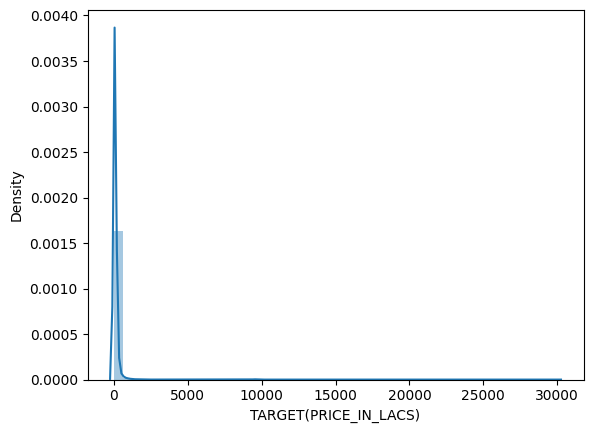

In [81]:
import seaborn as sns
sns.distplot(housing['TARGET(PRICE_IN_LACS)'])

In [82]:
housing['TARGET(PRICE_IN_LACS)'].value_counts()

TARGET(PRICE_IN_LACS)
110.0      795
100.0      770
120.0      652
130.0      598
45.0       583
          ... 
86.1         1
1550.0       1
28000.0      1
9910.0       1
18.3         1
Name: count, Length: 1172, dtype: int64

In [83]:
housing.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),Price_Per_SQFT
count,29460.000000,29460.000000,29460.000000,2.946000e+04,29460.000000,29460.000000,29460.000000,29460.000000
mean,0.179701,0.317821,2.395519,1.979932e+04,0.820299,0.929599,143.007840,7503.106178
std,0.383945,0.465637,0.898294,1.901044e+06,0.383945,0.255825,656.810013,10846.424169
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,0.250000,1.000000
25%,0.000000,0.000000,2.000000,9.000225e+02,1.000000,1.000000,38.000000,3553.000000
50%,0.000000,0.000000,2.000000,1.175088e+03,1.000000,1.000000,62.000000,5093.000000
75%,0.000000,1.000000,3.000000,1.552067e+03,1.000000,1.000000,100.000000,8055.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,30000.000000,900000.000000


In [84]:
#import numpy as np
Q1 = np.percentile(housing['TARGET(PRICE_IN_LACS)'],25)
Q3 = np.percentile(housing['TARGET(PRICE_IN_LACS)'], 75)
IQR = Q3 - Q1
IQR

62.0

In [85]:
upper = np.where(housing['TARGET(PRICE_IN_LACS)'] > (Q3+1.5*IQR))
# Lower bound
lower = np.where(housing['TARGET(PRICE_IN_LACS)'] < (Q1-1.5*IQR))

In [86]:
housing.drop(upper[0], inplace = True)
housing.drop(lower[0], inplace = True)

In [87]:
housing.shape

(26367, 10)

In [88]:
#housing =housing.sort_values('TARGET(PRICE_IN_LACS)',ascending=False)

C:\Users\gs671\AppData\Local\Temp\ipykernel_8976\4208369730.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['TARGET(PRICE_IN_LACS)'])


<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

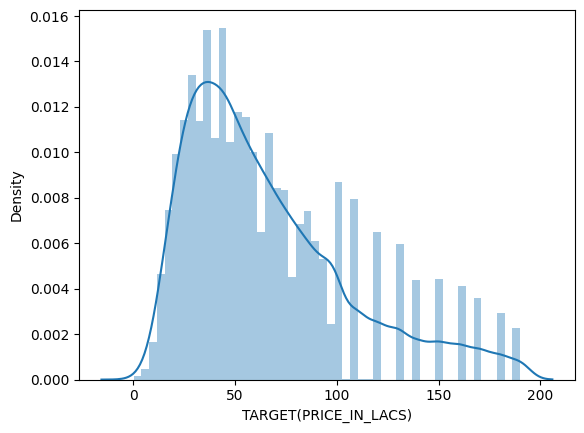

In [89]:
sns.distplot(housing['TARGET(PRICE_IN_LACS)'])

## Cleaning the outliers of sqft

C:\Users\gs671\AppData\Local\Temp\ipykernel_8976\989767318.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['SQUARE_FT'])


<Axes: xlabel='SQUARE_FT', ylabel='Density'>

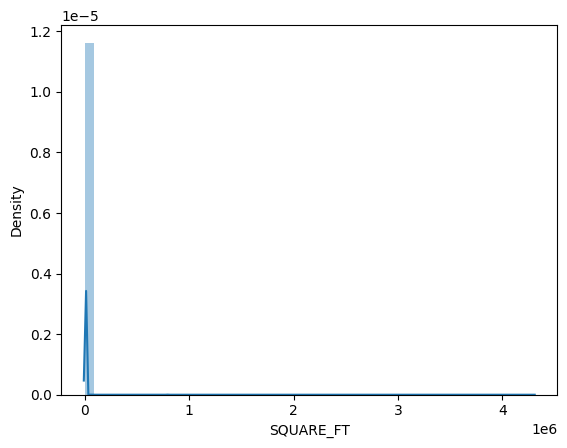

In [90]:
sns.distplot(housing['SQUARE_FT'])

In [91]:
housing['SQUARE_FT'].value_counts()

SQUARE_FT
1000.000000    467
1250.000000    277
800.000000     198
1200.000000    175
1500.000000    107
              ... 
1655.115341      1
2102.631579      1
620.113238       1
1039.046265      1
896.774194       1
Name: count, Length: 17265, dtype: int64

In [92]:
s1=np.percentile(housing['SQUARE_FT'],10)
s3=np.percentile(housing['SQUARE_FT'], 90)
sqr=s3-s1
s1,s3,sqr

(624.03152416, 1812.3020378000006, 1188.2705136400004)

In [93]:
housing['SQUARE_FT']  = np.where(housing['SQUARE_FT'] <621, 621,housing['SQUARE_FT'] )
housing['SQUARE_FT']  = np.where(housing['SQUARE_FT'] > 1814,  1814,housing['SQUARE_FT'] )
print(housing['SQUARE_FT'] .skew())

0.23746942380685657


In [94]:
housing = housing.sort_values('SQUARE_FT',ascending=False)
housing.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),Price_Per_SQFT
count,26367.000000,26367.000000,26367.000000,26367.000000,26367.000000,26367.000000,26367.000000,26367.000000
mean,0.178822,0.306709,2.289225,1167.166184,0.821178,0.933895,66.153713,6005.852088
std,0.383210,0.461136,0.771180,380.063921,0.383210,0.248471,40.534850,8681.737034
min,0.000000,0.000000,1.000000,621.000000,0.000000,0.000000,0.250000,1.000000
25%,0.000000,0.000000,2.000000,860.296106,1.000000,1.000000,35.000000,3418.000000
50%,0.000000,0.000000,2.000000,1132.125733,1.000000,1.000000,55.000000,4736.000000
75%,0.000000,1.000000,3.000000,1450.326323,1.000000,1.000000,87.000000,6879.500001
max,1.000000,1.000000,20.000000,1814.000000,1.000000,1.000000,190.000000,900000.000000


In [95]:
housing['SQUARE_FT'].value_counts()

SQUARE_FT
1814.000000    2633
621.000000     2612
1000.000000     467
1250.000000     277
800.000000      198
               ... 
1274.141631       1
1274.088231       1
1274.078568       1
1273.571221       1
1150.038081       1
Name: count, Length: 13338, dtype: int64

C:\Users\gs671\AppData\Local\Temp\ipykernel_8976\989767318.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['SQUARE_FT'])


<Axes: xlabel='SQUARE_FT', ylabel='Density'>

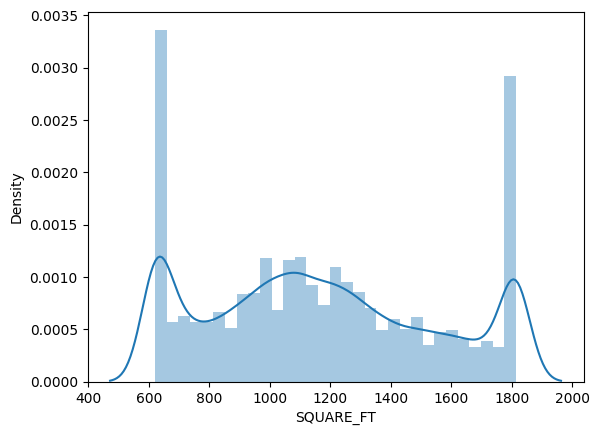

In [96]:
sns.distplot(housing['SQUARE_FT'])

## Removing outliers of bhk no

C:\Users\gs671\AppData\Local\Temp\ipykernel_8976\2967515802.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['BHK_NO.'])


<Axes: xlabel='BHK_NO.', ylabel='Density'>

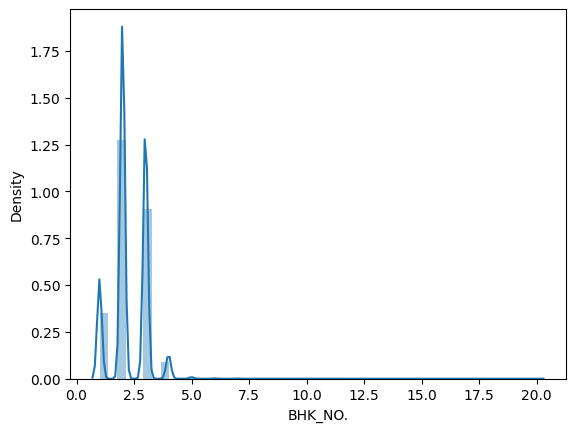

In [97]:
sns.distplot(housing['BHK_NO.'])

In [98]:
housing['BHK_NO.'] = housing['BHK_NO.'].apply(lambda x: x if x < 6 else 6)
housing['BHK_NO.'].value_counts()

BHK_NO.
2    12794
3     9079
1     3538
4      869
5       56
6       31
Name: count, dtype: int64

C:\Users\gs671\AppData\Local\Temp\ipykernel_8976\3468642219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['BHK_NO.'])


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),Price_Per_SQFT
count,26367.000000,26367.000000,26367.000000,26367.000000,26367.000000,26367.000000,26367.000000,26367.000000
mean,0.178822,0.306709,2.287139,1167.166184,0.821178,0.933895,66.153713,6005.852088
std,0.383210,0.461136,0.752227,380.063921,0.383210,0.248471,40.534850,8681.737034
min,0.000000,0.000000,1.000000,621.000000,0.000000,0.000000,0.250000,1.000000
25%,0.000000,0.000000,2.000000,860.296106,1.000000,1.000000,35.000000,3418.000000
50%,0.000000,0.000000,2.000000,1132.125733,1.000000,1.000000,55.000000,4736.000000
75%,0.000000,1.000000,3.000000,1450.326323,1.000000,1.000000,87.000000,6879.500001
max,1.000000,1.000000,6.000000,1814.000000,1.000000,1.000000,190.000000,900000.000000


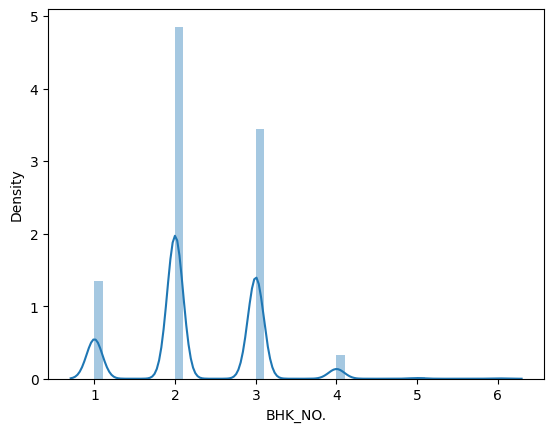

In [99]:
sns.distplot(housing['BHK_NO.'])
housing.describe()

In [100]:
housing=housing.drop(['UNDER_CONSTRUCTION','READY_TO_MOVE','RESALE','BHK_OR_RK','Price_Per_SQFT'],axis=1)

In [101]:
housing.to_csv("cleaned_data.csv")

In [102]:
from sklearn import preprocessing
def label_encoder(housing, column_name):
    label_encoder = preprocessing.LabelEncoder()

    housing[column_name]= label_encoder.fit_transform(housing[column_name])
    print(column_name)
    for i in range(len(housing[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(housing[column_name].value_counts())
    print('-'*10)
    
    return housing[column_name], label_encoder

In [103]:
housing['ADDRESS'], label_encoder_posted_by = label_encoder(housing, 'ADDRESS')

ADDRESS
For 0 : ['Agartala']
For 1 : ['Agra']
For 2 : ['Ahmednagar']
For 3 : ['Ajmer']
For 4 : ['Akola']
For 5 : ['Aligarh']
For 6 : ['Allahabad']
For 7 : ['Alwar']
For 8 : ['Ambala']
For 9 : ['Amravati']
For 10 : ['Amritsar']
For 11 : ['Amroha']
For 12 : ['Anand']
For 13 : ['Anantapur']
For 14 : ['Angul']
For 15 : ['Arrah']
For 16 : ['Asansol']
For 17 : ['Aurangabad']
For 18 : ['Baddi']
For 19 : ['Bahadurgarh']
For 20 : ['Balasore']
For 21 : ['Bangalore']
For 22 : ['Bankura']
For 23 : ['Banswara']
For 24 : ['Barabanki']
For 25 : ['Bardhaman']
For 26 : ['Bareilly']
For 27 : ['Beed']
For 28 : ['Belgaum']
For 29 : ['Berhampur']
For 30 : ['Betul']
For 31 : ['Bhadrak']
For 32 : ['Bhagalpur']
For 33 : ['Bhandara']
For 34 : ['Bharatpur']
For 35 : ['Bharuch']
For 36 : ['Bhavnagar']
For 37 : ['Bhilai']
For 38 : ['Bhimavaram']
For 39 : ['Bhiwadi']
For 40 : ['Bhiwani']
For 41 : ['Bhopal']
For 42 : ['Bhubaneswar']
For 43 : ['Bhuj']
For 44 : ['Bikaner']
For 45 : ['Bilaspur']
For 46 : ['Bokaro']
Fo

##  Train-Test Spiliting

In [104]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [105]:
train_set,test_set=split_train_test(housing,0.2)

[25944  4405 18664 ...   860 15795 23654]


In [106]:
print(f"Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set:21094
Rows in test set: 5273



In [107]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set:21093
Rows in test set: 5274



In [108]:
#from sklearn.model_selection import StratifiedShuffleSplit
#split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
#for train_index, test_index in split.split(housing,housing['BHK_N0.']):
 #strat_train_set=housing.loc[train_index]
#strat_test_set=housing.loc[test_index]

In [109]:
strat_train_set=train_set
strat_test_set=test_set

In [110]:
strat_train_set.shape

(21093, 5)

In [111]:
strat_train_set.describe()

,RERA,BHK_NO.,SQUARE_FT,ADDRESS,TARGET(PRICE_IN_LACS)
count,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000
mean,0.306500,2.286872,1166.311355,116.148201,66.069103
std,0.461051,0.754000,380.031293,65.966970,40.521177
min,0.000000,1.000000,621.000000,1.000000,0.250000
25%,0.000000,2.000000,861.775860,49.000000,35.000000
50%,0.000000,2.000000,1129.908619,133.000000,55.000000
75%,1.000000,3.000000,1450.209475,164.000000,87.000000
max,1.000000,6.000000,1814.000000,253.000000,190.000000


In [112]:
strat_test_set.shape

(5274, 5)

In [113]:
strat_test_set.value_counts('BHK_NO.')

BHK_NO.
2    2587
3    1816
1     687
4     167
5      11
6       6
Name: count, dtype: int64

In [114]:
strat_train_set.value_counts('BHK_NO.')

BHK_NO.
2    10207
3     7263
1     2851
4      702
5       45
6       25
Name: count, dtype: int64

In [115]:
housing=strat_train_set.copy()

In [116]:
housing=strat_train_set.drop("TARGET(PRICE_IN_LACS)",axis=1)
housing_labels=strat_train_set["TARGET(PRICE_IN_LACS)"].copy()

## Creating a Pipeline

In [117]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler 
my_pipeline=Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
    # .....add as many as you want in your pipeline
 ('std_scaler',StandardScaler()),
])

In [118]:
housing_num=my_pipeline.fit_transform(housing)

In [119]:
housing_num.shape

(21093, 4)

## Selecting a desired model

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num,housing_labels)

RandomForestRegressor()

In [121]:
some_data=housing.iloc[:5]
print(some_data)

       RERA  BHK_NO.    SQUARE_FT  ADDRESS
14925     0        1   621.000000      141
22851     1        1   685.027261      157
20607     1        2   621.000000      157
2117      0        1   665.821179       75
23211     1        3  1814.000000       49


In [122]:
some_labels=housing_labels.iloc[:5]

In [123]:
prepared_data=my_pipeline.transform(some_data)
prepared_data

array([[-0.66480119, -1.70676813, -1.43494573,  0.37673988],
       [ 1.5042091 , -1.70676813, -1.26646282,  0.61929125],
       [ 1.5042091 , -0.38047649, -1.43494573,  0.61929125],
       [-0.66480119, -1.70676813, -1.31700218, -0.62378454],
       [ 1.5042091 ,  0.94581514,  1.70434385, -1.01793053]])

In [124]:
model.predict(prepared_data)

array([62.23698837, 51.192     , 93.38066227, 22.045     , 86.62357798])

In [125]:
list(some_labels)

[42.5, 49.0, 77.1, 21.0, 79.0]

## Evaluating model

In [126]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)

In [127]:
lin_mse

214.68809605030108

In [128]:
lin_rmse

14.652238602012359

In [129]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num,housing_labels,scoring="neg_mean_squared_error")
rmse_scores=(-scores)

In [130]:
rmse_scores

array([658.53303762, 635.99660193, 678.43730237, 665.38452436,
       635.16126106])

In [131]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation",scores.std())

In [132]:
print_scores(rmse_scores)

Scores: [658.53303762 635.99660193 678.43730237 665.38452436 635.16126106]
Mean: 654.7025454677524
Standard deviation 16.87536753974217


## Saving the model

In [133]:
from joblib import dump,load
dump(model,'HousePricePridiction.joblib')

['HousePricePridiction.joblib']

##  Testing the model on Test data

In [134]:
X_test=strat_test_set.drop("TARGET(PRICE_IN_LACS)",axis=1)
Y_test=strat_test_set["TARGET(PRICE_IN_LACS)"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_prediction=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_prediction)
final_rmse=np.sqrt(final_mse)
print(final_prediction,list(Y_test))

[ 31.43501589  80.4        139.60133333 ...  31.55        46.328
  61.72      ] [26.5, 74.9, 76.0, 170.0, 110.0, 40.0, 70.0, 11.3, 28.0, 150.0, 45.0, 53.0, 65.0, 85.0, 190.0, 43.0, 37.0, 25.0, 190.0, 36.0, 110.0, 85.0, 70.0, 91.1, 67.2, 150.0, 80.3, 18.5, 85.0, 30.0, 30.0, 66.5, 26.0, 60.0, 67.0, 56.0, 33.0, 32.0, 49.4, 25.0, 140.0, 40.0, 17.5, 60.0, 32.0, 89.0, 37.5, 17.5, 22.5, 29.0, 49.0, 44.4, 67.5, 37.0, 170.0, 110.0, 50.0, 75.0, 45.0, 25.0, 55.1, 85.0, 67.2, 45.0, 55.0, 160.0, 34.0, 28.8, 48.5, 58.0, 34.5, 72.6, 140.0, 70.0, 42.0, 56.9, 87.0, 20.0, 87.0, 56.5, 120.0, 110.0, 25.0, 18.0, 30.6, 50.2, 24.0, 99.9, 150.0, 130.0, 160.0, 51.0, 28.0, 65.0, 20.0, 96.0, 37.0, 51.0, 45.0, 75.0, 72.0, 160.0, 27.0, 99.6, 17.8, 26.0, 120.0, 90.0, 68.0, 38.0, 12.0, 110.0, 100.0, 16.0, 13.0, 100.0, 90.0, 53.0, 40.0, 96.0, 80.0, 40.0, 42.0, 20.0, 50.0, 69.0, 18.1, 150.0, 30.0, 65.0, 55.0, 27.0, 110.0, 100.0, 42.5, 15.0, 64.0, 31.0, 53.0, 20.0, 75.0, 47.0, 95.0, 45.0, 100.0, 45.0, 130.0, 34.1, 85.8

In [135]:
final_rmse

25.35352113879704

In [136]:
prepared_data[0]

array([-0.66480119, -1.70676813, -1.43494573,  0.37673988])

In [137]:
#from joblib import dump,load
#import numpy as np
#model=load('HousePricePridiction.joblib')
#input=np.array([[-0.6530879 , -0.46803365, -0.68300252,  0.65289198, -0.02686704,
     #  -0.01066568,  0.46803365,  0.27446248, -1.48593816, -1.35187528,
     #   0.07956222]])
#model.predict(input)